In [6]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

In [8]:
def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

train_data = vectorize_sequences(train_data)

In [9]:
# Original model

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history_original = model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7101 - loss: 0.6022 - val_accuracy: 0.8639 - val_loss: 0.4057
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8871 - loss: 0.3576 - val_accuracy: 0.8801 - val_loss: 0.3253
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9178 - loss: 0.2586 - val_accuracy: 0.8908 - val_loss: 0.2831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9335 - loss: 0.2031 - val_accuracy: 0.8909 - val_loss: 0.2733
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9487 - loss: 0.1631 - val_accuracy: 0.8807 - val_loss: 0.2966
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9553 - loss: 0.1379 - val_accuracy: 0.8857 - val_loss: 0.2876
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9650 - loss: 0.1185 - val_accuracy: 0.8690 - val_loss: 0.3461
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9702 - loss: 0.1061 - val_accuracy: 0.8852 - v

In [10]:
history_original_dict = history_original.history
history_original_val_loss = history_original_dict["val_loss"]


In [11]:
# Model with weight regularization
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = "relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = "relu"),
    layers.Dense(1, activation= "sigmoid")
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history_l2_model = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = .4)

history_l2_dict = history_l2_model.history
history_l2_val_loss = history_l2_dict["val_loss"]

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7067 - loss: 0.6739 - val_accuracy: 0.8369 - val_loss: 0.4874
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8914 - loss: 0.4124 - val_accuracy: 0.8772 - val_loss: 0.3948
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9181 - loss: 0.3249 - val_accuracy: 0.8794 - val_loss: 0.3753
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9360 - loss: 0.2848 - val_accuracy: 0.8607 - val_loss: 0.4139
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9360 - loss: 0.2690 - val_accuracy: 0.8870 - val_loss: 0.3572
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9453 - loss: 0.2516 - val_accuracy: 0.8859 - val_loss: 0.3596
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9450 - loss: 0.2418 - val_accuracy: 0.8852 - val_loss: 0.3668
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9576 - loss: 0.2234 - val_accuracy: 0.8830 - 

In [12]:
print(len(history_l2_val_loss))

20


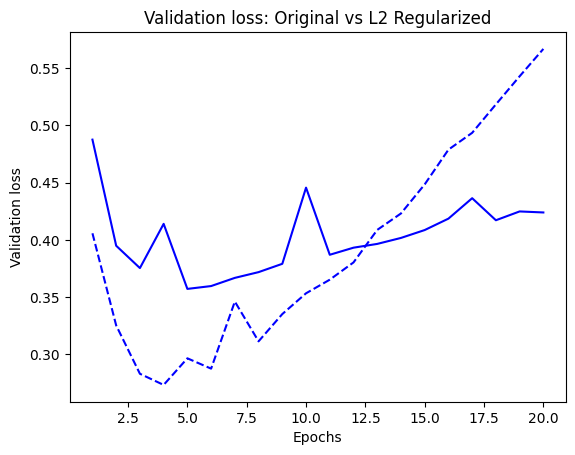

In [13]:
epochs = range(1, len(history_l2_val_loss) + 1)

plt.plot(epochs, history_original_val_loss, "b--", label = "Original model val loss")
plt.plot(epochs, history_l2_val_loss, "b",label = "Regularized model val loss")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss: Original vs L2 Regularized")
plt.show()

In [16]:
#  0.002 * weight_coefficient_value ** 2
# this cost is added to total loss
# L2 regularized model has become more resistant to overfitting as compared to original model, given that there are same number of parameters

regularizers.l1(0.001)
regularizers.l1_l2(l1= 0.001, l2 = 0.002) # simulataneous l1 and l2

# Useful for smaller deep learning mdoels